In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

# Настройка для русского языка
rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Загрузка данных
df = pd.read_csv('dataset/ryzen7_7840HS.csv')
print("Размер датасета:", df.shape)
print("\nПервые 10 строк:")
print(df.head(10))
print("\nУникальные алгоритмы:")
print(df['algo'].unique())
print("\nУникальные размеры матриц:")
print(sorted(df['N'].unique()))


Размер датасета: (16265, 6)

Первые 10 строк:
     N r_percent r_actual  trial                  algo  duration_ms
0  100         -        -      1                 point        0.620
1  100         -        -      1             point_ikj        0.197
2  100         -        -      1             par_point        0.867
3  100         -        -      1         par_point_ikj        0.133
4  100         -        -      1  par_point_ikj_reduce        0.204
5  100         0        1      1                 block        3.157
6  100         0        1      1             block_ikj        5.979
7  100         0        1      1         par_block_ikj        0.895
8  100         0        1      1        par_block_ikj2        0.588
9  100         0        1      1       par_block_pairs        1.577

Уникальные алгоритмы:
['point' 'point_ikj' 'par_point' 'par_point_ikj' 'par_point_ikj_reduce'
 'block' 'block_ikj' 'par_block_ikj' 'par_block_ikj2' 'par_block_pairs']

Уникальные размеры матриц:
[np.int64(

In [28]:
# Анализ данных
print("Статистика по времени выполнения:")
print(df.groupby('algo')['duration_ms'].describe())

print("\nКоличество экспериментов по алгоритмам:")
print(df['algo'].value_counts())

# Группировка данных для анализа
point_algorithms = ['point', 'point_ikj']
parallel_point_algorithms = ['par_point', 'par_point_ikj', 'par_point_ikj_reduce']
block_algorithms = ['block', 'block_ikj']
parallel_block_algorithms = ['par_block_ikj', 'par_block_ikj2', 'par_block_pairs']

print("\nАлгоритмы по категориям:")
print("Точечные алгоритмы:", point_algorithms)
print("Параллельные точечные:", parallel_point_algorithms)
print("Блочные алгоритмы:", block_algorithms)
print("Параллельные блочные:", parallel_block_algorithms)


Статистика по времени выполнения:
                       count         mean          std    min       25%  \
algo                                                                      
block                 3131.0  1127.785982  4653.811716  0.479  14.63300   
block_ikj             3131.0   441.599394  2680.865697  0.160   5.57850   
par_block_ikj         3131.0    81.047947   382.915011  0.127   2.14550   
par_block_ikj2        3131.0   118.337182   301.248996  0.185   3.79950   
par_block_pairs       3131.0    76.533218   403.541040  0.123   1.74300   
par_point              122.0   210.275762  1316.578171  0.188   2.54400   
par_point_ikj          122.0    21.875549    54.559152  0.132   0.79800   
par_point_ikj_reduce   122.0   207.863205  1264.894612  0.191   1.96275   
point                  122.0  1841.481344  9736.790322  0.591  17.86375   
point_ikj              122.0   123.861082   353.826238  0.168   2.49825   

                         50%        75%         max  
algo       

<Figure size 1500x1000 with 0 Axes>

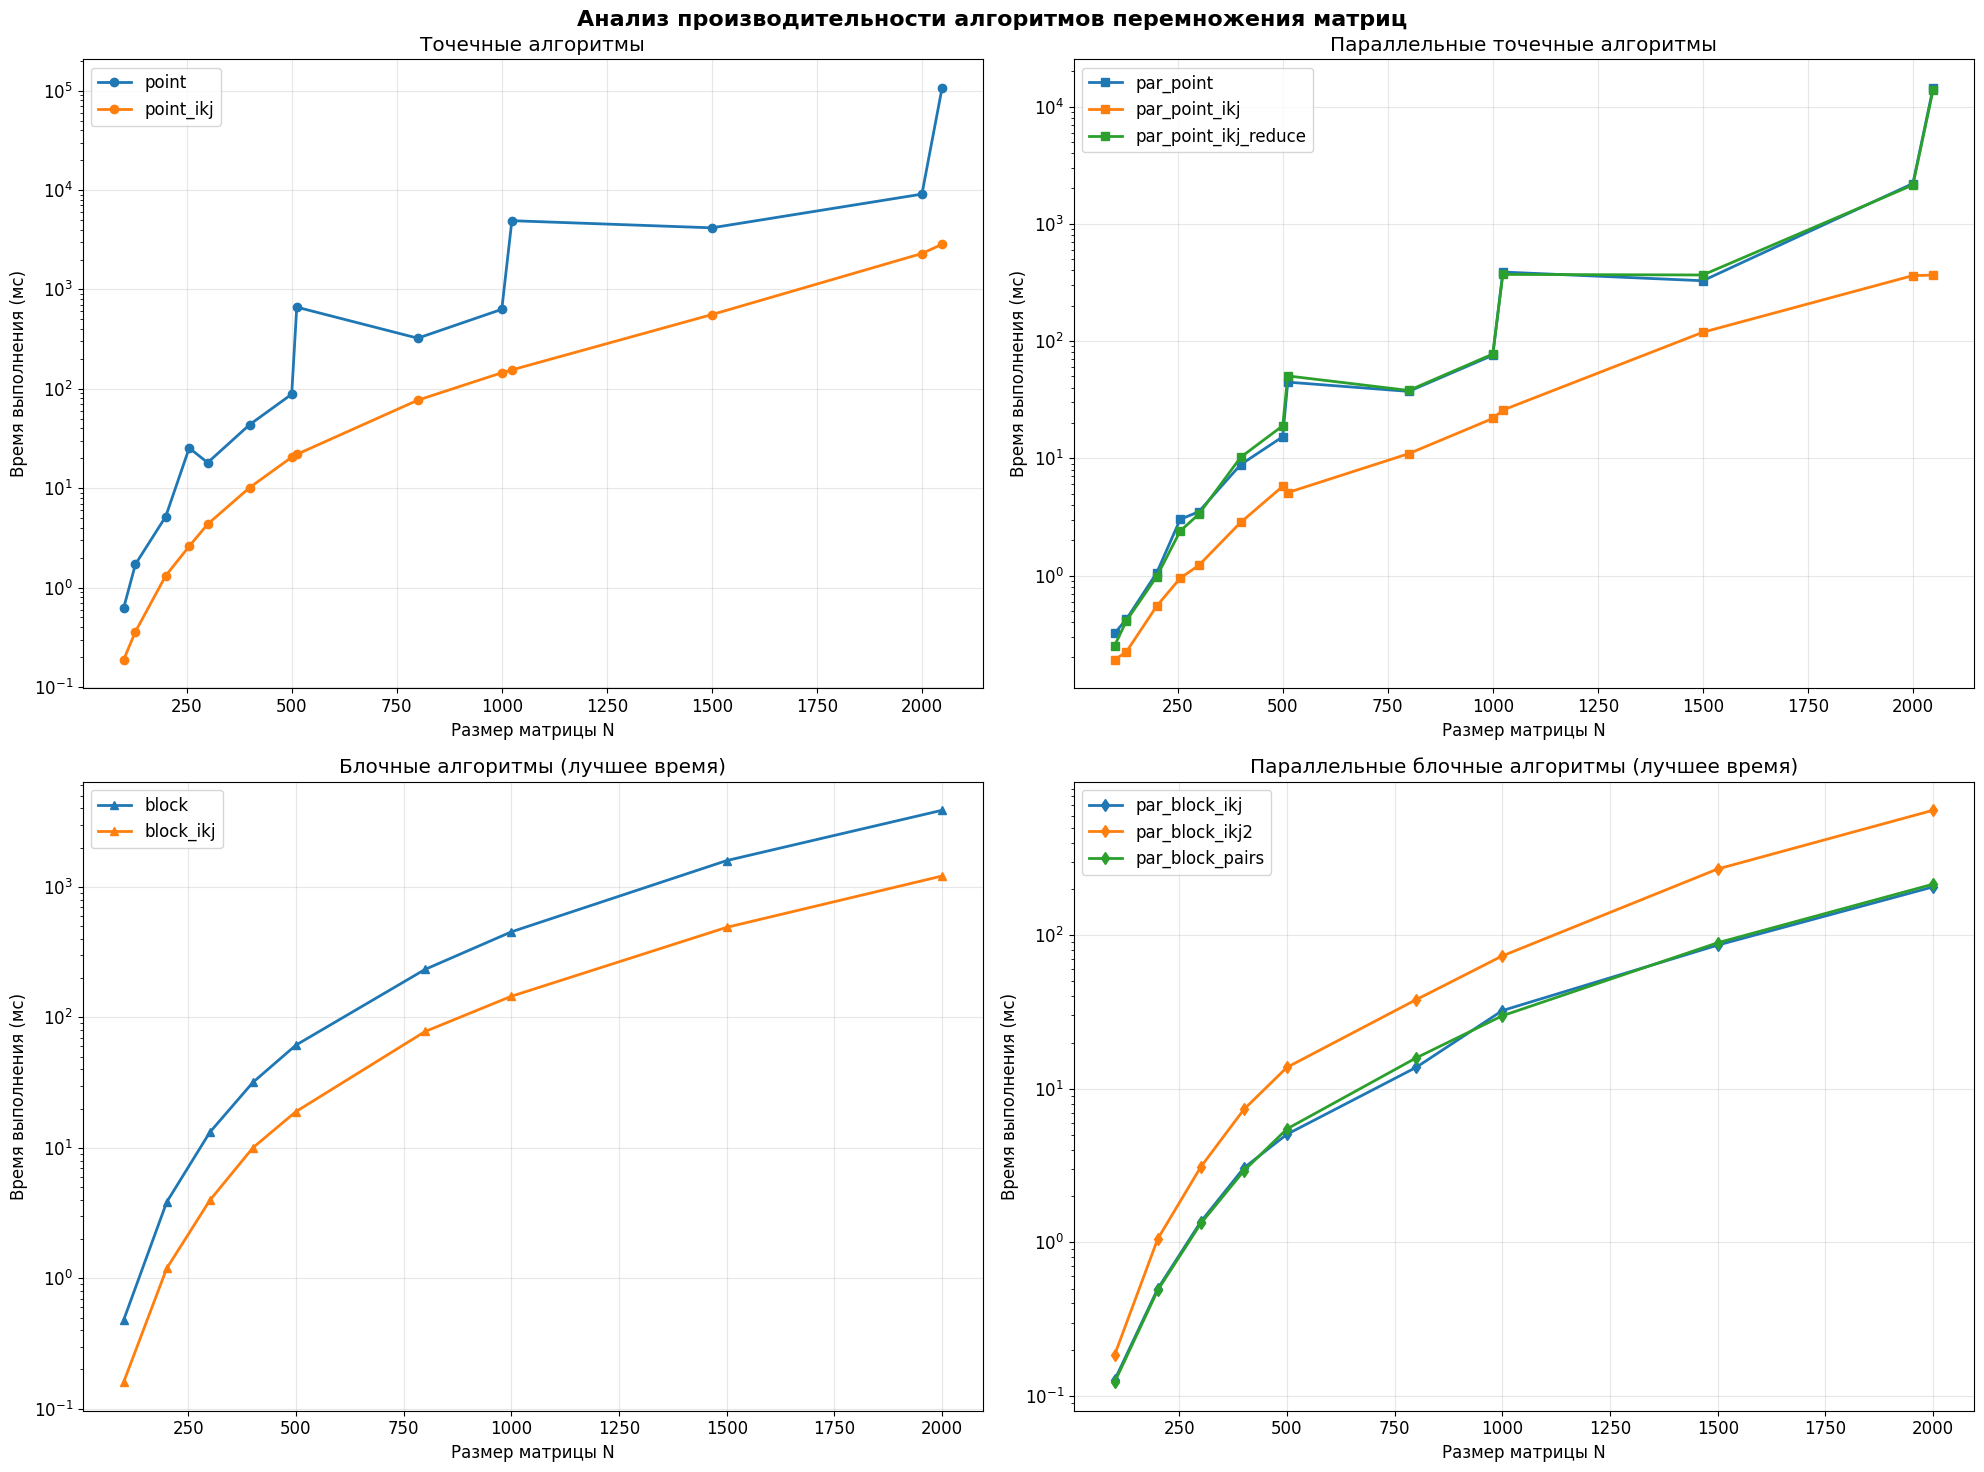

In [29]:
# График 1: Сравнение производительности алгоритмов по размерам матриц
plt.figure(figsize=(15, 10))

# Подготовка данных - средние значения по всем испытаниям
df_avg = df.groupby(['N', 'algo'])['duration_ms'].mean().reset_index()

# Создание подграфиков
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Анализ производительности алгоритмов перемножения матриц', fontsize=16, fontweight='bold')

# График 1: Точечные алгоритмы
ax1 = axes[0, 0]
for algo in point_algorithms:
    data = df_avg[df_avg['algo'] == algo]
    ax1.plot(data['N'], data['duration_ms'], marker='o', linewidth=2, label=algo)
ax1.set_xlabel('Размер матрицы N')
ax1.set_ylabel('Время выполнения (мс)')
ax1.set_title('Точечные алгоритмы')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')

# График 2: Параллельные точечные алгоритмы
ax2 = axes[0, 1]
for algo in parallel_point_algorithms:
    data = df_avg[df_avg['algo'] == algo]
    ax2.plot(data['N'], data['duration_ms'], marker='s', linewidth=2, label=algo)
ax2.set_xlabel('Размер матрицы N')
ax2.set_ylabel('Время выполнения (мс)')
ax2.set_title('Параллельные точечные алгоритмы')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_yscale('log')

# График 3: Блочные алгоритмы (лучшее время по всем размерам блоков)
ax3 = axes[1, 0]
block_best_times = []
for n in [100, 200, 300, 400, 500, 800, 1000, 1500, 2000]:
    for algo in block_algorithms:
        algo_data = df[(df['N'] == n) & (df['algo'] == algo)]
        if not algo_data.empty:
            best_time = algo_data['duration_ms'].min()
            block_best_times.append({'N': n, 'algo': algo, 'time': best_time})

if block_best_times:
    block_best_df = pd.DataFrame(block_best_times)
    for algo in block_algorithms:
        algo_data = block_best_df[block_best_df['algo'] == algo]
        if not algo_data.empty:
            ax3.plot(algo_data['N'], algo_data['time'], marker='^', linewidth=2, label=algo)

ax3.set_xlabel('Размер матрицы N')
ax3.set_ylabel('Время выполнения (мс)')
ax3.set_title('Блочные алгоритмы (лучшее время)')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_yscale('log')

# График 4: Параллельные блочные алгоритмы (лучшее время по всем размерам блоков)
ax4 = axes[1, 1]
par_block_best_times = []
for n in [100, 200, 300, 400, 500, 800, 1000, 1500, 2000]:
    for algo in parallel_block_algorithms:
        algo_data = df[(df['N'] == n) & (df['algo'] == algo)]
        if not algo_data.empty:
            best_time = algo_data['duration_ms'].min()
            par_block_best_times.append({'N': n, 'algo': algo, 'time': best_time})

if par_block_best_times:
    par_block_best_df = pd.DataFrame(par_block_best_times)
    for algo in parallel_block_algorithms:
        algo_data = par_block_best_df[par_block_best_df['algo'] == algo]
        if not algo_data.empty:
            ax4.plot(algo_data['N'], algo_data['time'], marker='d', linewidth=2, label=algo)

ax4.set_xlabel('Размер матрицы N')
ax4.set_ylabel('Время выполнения (мс)')
ax4.set_title('Параллельные блочные алгоритмы (лучшее время)')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_yscale('log')

plt.tight_layout()
plt.show()


<Figure size 2000x1200 with 0 Axes>

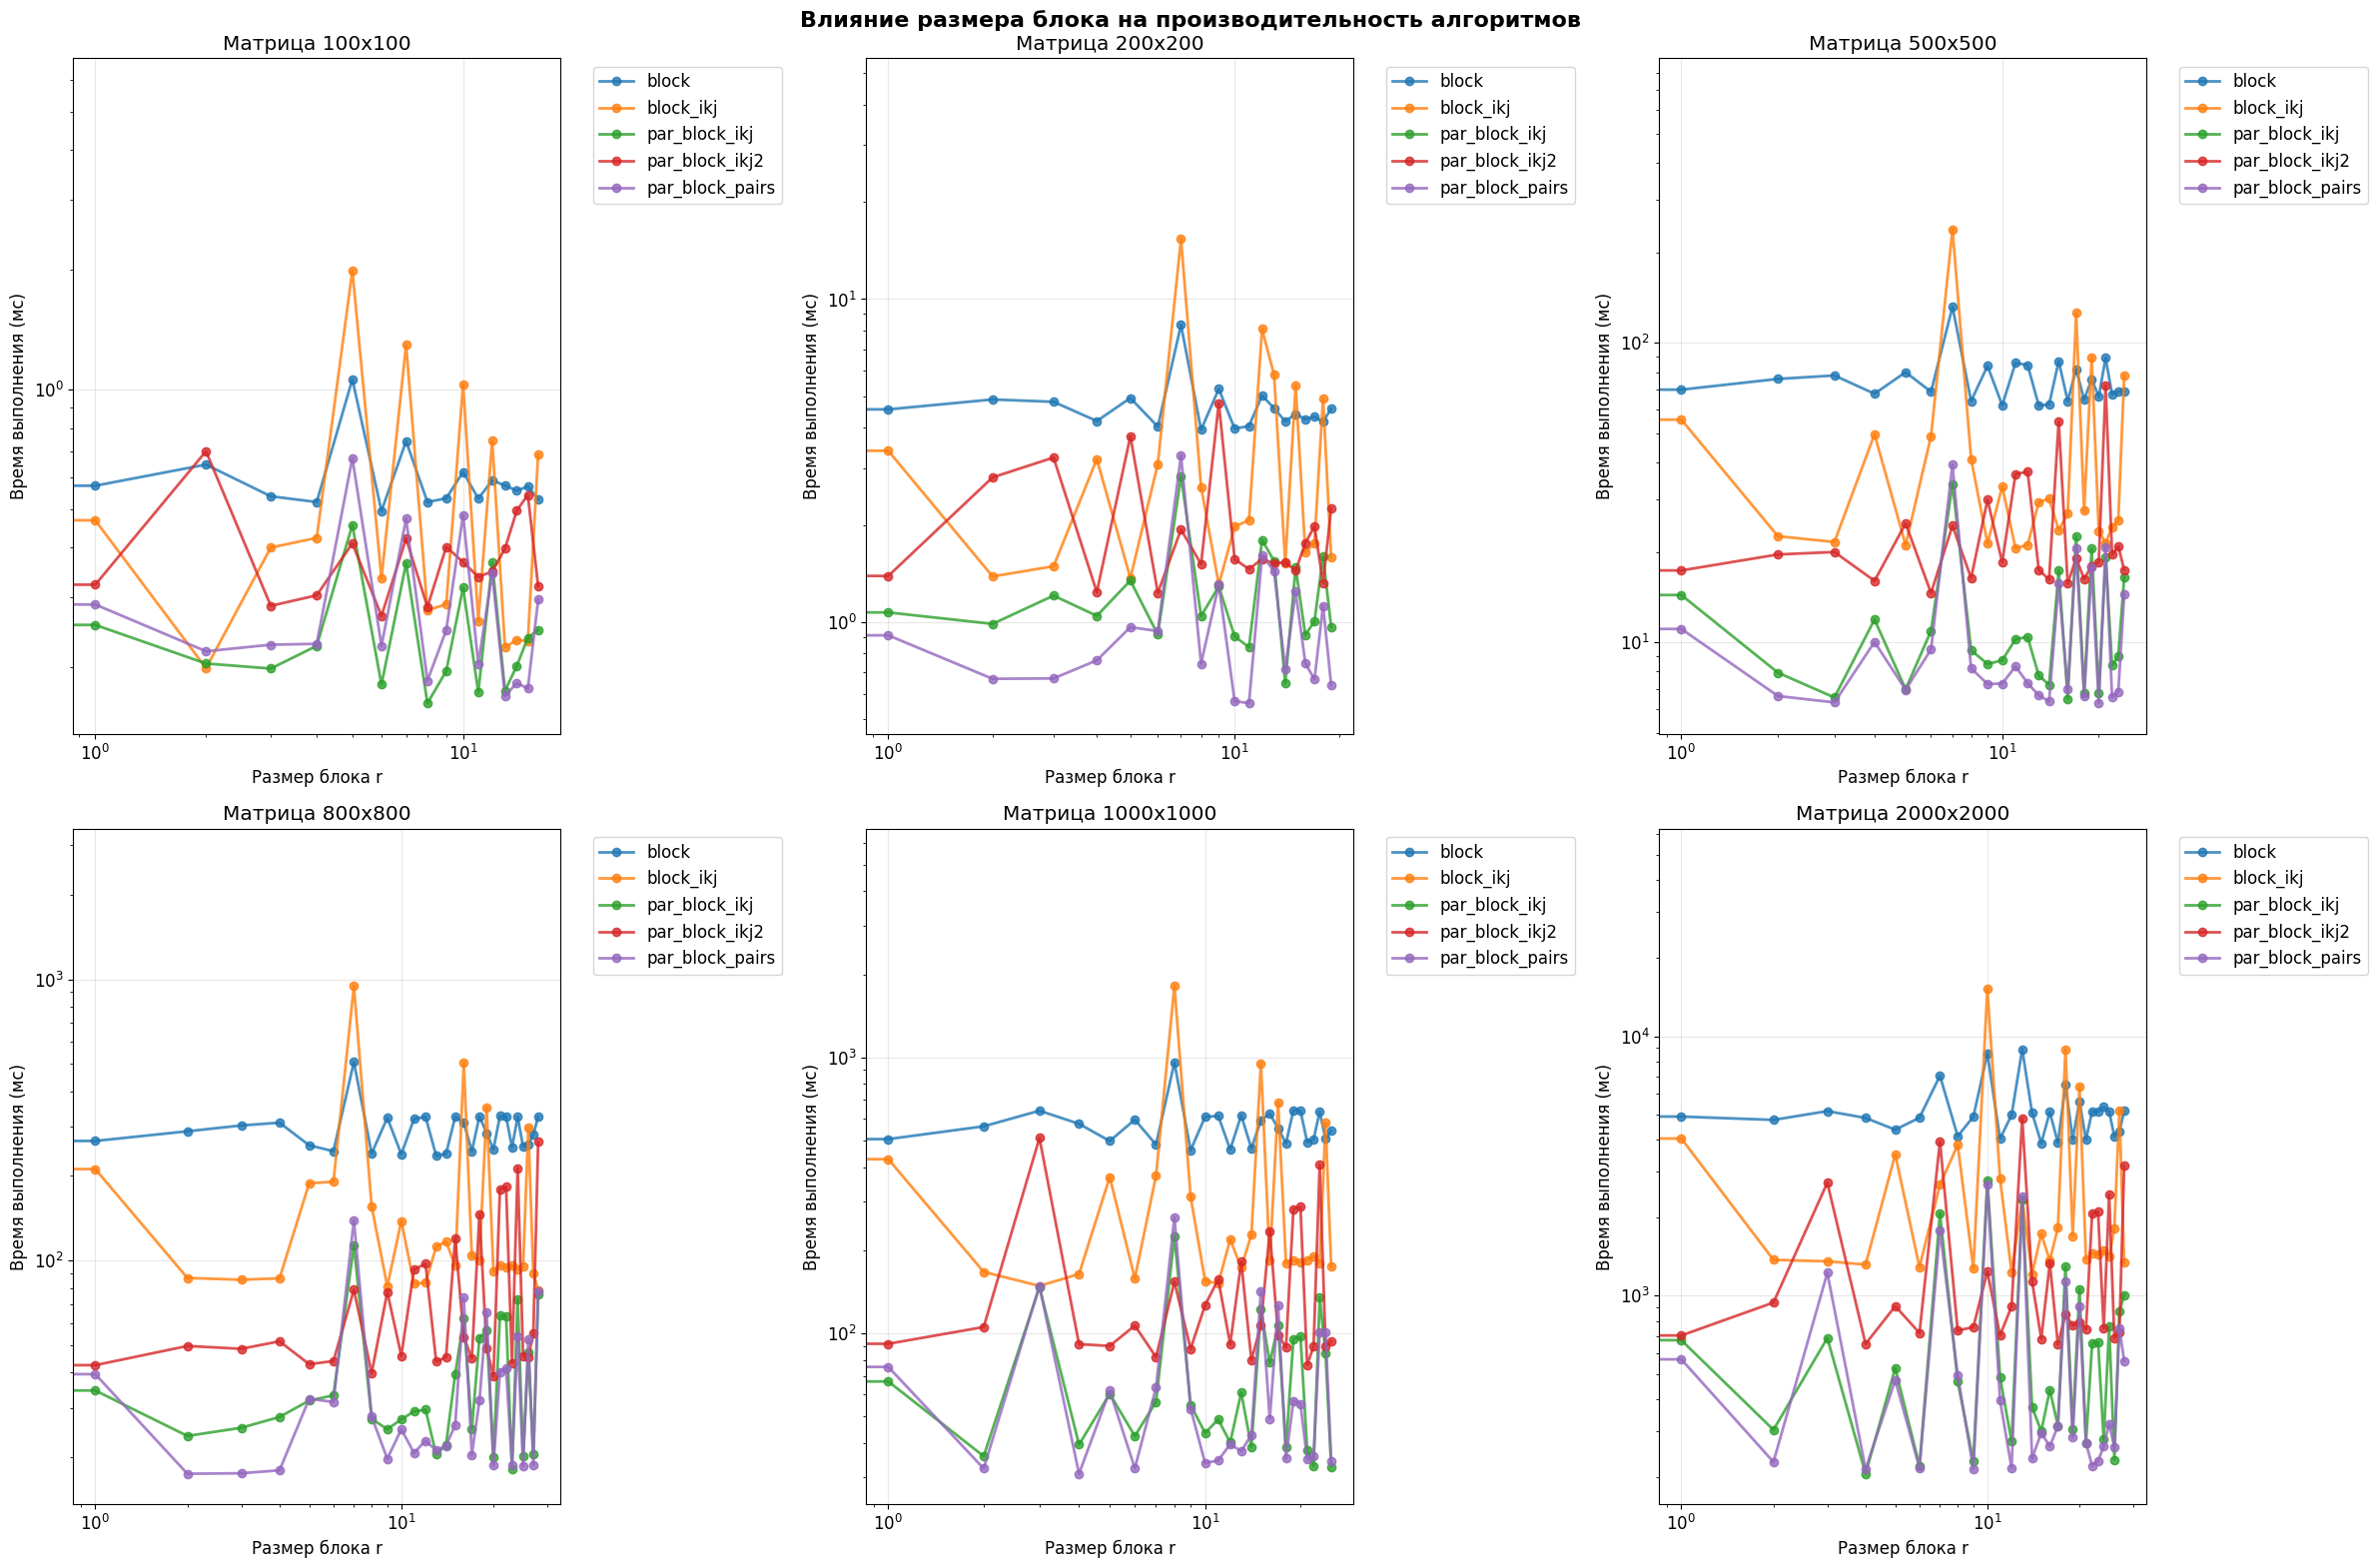

In [30]:
# График 2: Влияние размера блока на производительность
plt.figure(figsize=(20, 12))

# Фильтруем данные для блочных алгоритмов с различными размерами блоков
block_data = df[df['algo'].isin(block_algorithms + parallel_block_algorithms)].copy()

# Создаем подграфики для разных размеров матриц
fig, axes = plt.subplots(2, 3, figsize=(24, 16))
fig.suptitle('Влияние размера блока на производительность алгоритмов', fontsize=16, fontweight='bold')

# Выбираем несколько размеров матриц для анализа
matrix_sizes = [100, 200, 500, 800, 1000, 2000]
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']

for idx, n in enumerate(matrix_sizes):
    if idx >= 6:  # Максимум 6 подграфиков
        break
        
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Данные для данного размера матрицы
    n_data = block_data[block_data['N'] == n]
    
    if not n_data.empty:
        # Группируем по алгоритму и размеру блока
        grouped = n_data.groupby(['algo', 'r_actual'])['duration_ms'].mean().reset_index()
        
        for algo in block_algorithms + parallel_block_algorithms:
            algo_data = grouped[grouped['algo'] == algo]
            if not algo_data.empty:
                ax.plot(algo_data['r_actual'], algo_data['duration_ms'], 
                       marker='o', linewidth=2, label=algo, alpha=0.8)
        
        ax.set_xlabel('Размер блока r')
        ax.set_ylabel('Время выполнения (мс)')
        ax.set_title(f'Матрица {n}x{n}')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(True, alpha=0.3)
        ax.set_xscale('log')
        ax.set_yscale('log')

plt.tight_layout()
plt.show()


<Figure size 1600x1000 with 0 Axes>

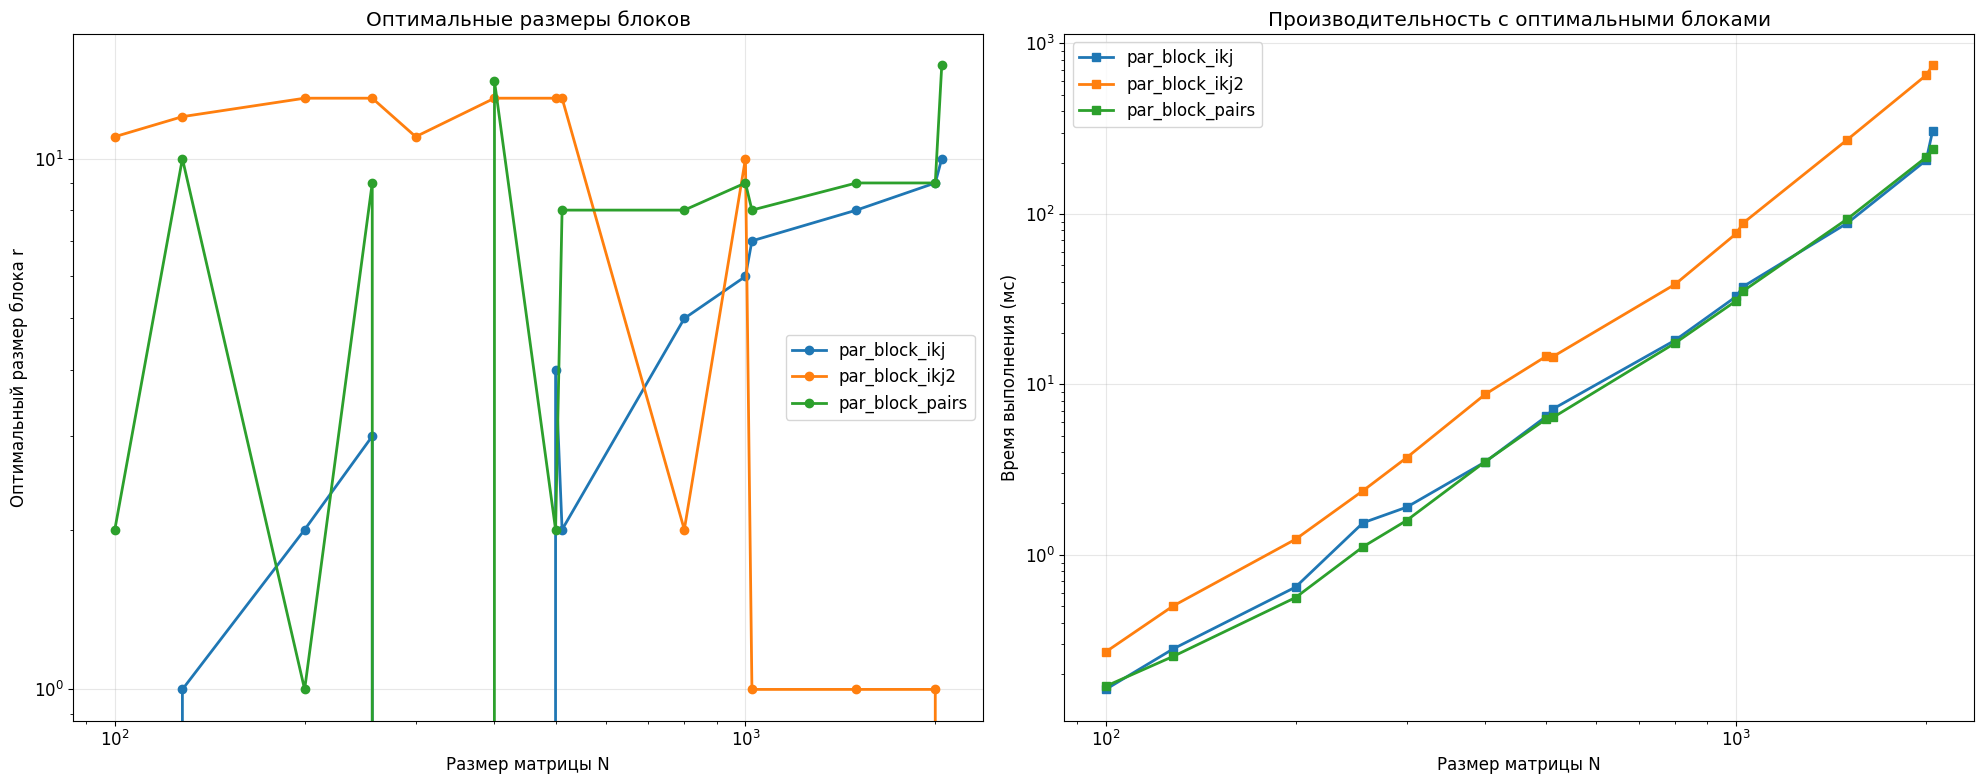

Оптимальные размеры блоков:
algo par_block_ikj par_block_ikj2 par_block_pairs
N                                                
100             30             20              50
128             32             15              64
200             50             16              32
256             26             16             128
300             30             20              30
400             30             16             120
500             38             16              50
512             50             16             100
800             60             50             100
1000            80             64             128
1024            82             32             100
1500           100             32             128
2000           128             32             128
2048            64             30             512

Статистика оптимальных блоков:
Всего записей: 42
Алгоритмы: ['par_block_ikj' 'par_block_ikj2' 'par_block_pairs']
Размеры матриц: [np.int64(100), np.int64(128), np.int64(20

In [31]:
# График 3: Оптимальные размеры блоков
plt.figure(figsize=(16, 10))

# Найдем оптимальные размеры блоков для каждого алгоритма и размера матрицы
optimal_blocks = []

for n in sorted(df['N'].unique()):
    for algo in parallel_block_algorithms:
        n_algo_data = df[(df['N'] == n) & (df['algo'] == algo)]
        if not n_algo_data.empty:
            # Группируем по размеру блока и находим минимальное время
            grouped = n_algo_data.groupby('r_actual')['duration_ms'].mean()
            if not grouped.empty:
                optimal_r = grouped.idxmin()
                optimal_time = grouped.min()
                optimal_blocks.append({
                    'N': n,
                    'algo': algo,
                    'optimal_r': optimal_r,
                    'optimal_time': optimal_time
                })

optimal_df = pd.DataFrame(optimal_blocks)

# Создаем график оптимальных размеров блоков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# График 1: Оптимальные размеры блоков по размерам матриц
for algo in parallel_block_algorithms:
    algo_data = optimal_df[optimal_df['algo'] == algo]
    if not algo_data.empty:
        ax1.plot(algo_data['N'], algo_data['optimal_r'], marker='o', linewidth=2, label=algo)

ax1.set_xlabel('Размер матрицы N')
ax1.set_ylabel('Оптимальный размер блока r')
ax1.set_title('Оптимальные размеры блоков')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xscale('log')
ax1.set_yscale('log')

# График 2: Время выполнения с оптимальными блоками
for algo in parallel_block_algorithms:
    algo_data = optimal_df[optimal_df['algo'] == algo]
    if not algo_data.empty:
        ax2.plot(algo_data['N'], algo_data['optimal_time'], marker='s', linewidth=2, label=algo)

ax2.set_xlabel('Размер матрицы N')
ax2.set_ylabel('Время выполнения (мс)')
ax2.set_title('Производительность с оптимальными блоками')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xscale('log')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

# Выводим таблицу оптимальных размеров блоков
print("Оптимальные размеры блоков:")
if not optimal_df.empty:
    optimal_pivot = optimal_df.pivot(index='N', columns='algo', values='optimal_r')
    print(optimal_pivot.fillna('-').to_string())
else:
    print("Нет данных для оптимальных размеров блоков")

# Выводим статистику
print(f"\nСтатистика оптимальных блоков:")
print(f"Всего записей: {len(optimal_df)}")
if not optimal_df.empty:
    print(f"Алгоритмы: {optimal_df['algo'].unique()}")
    print(f"Размеры матриц: {sorted(optimal_df['N'].unique())}")
    
    # Проверим данные для каждого алгоритма
    for algo in parallel_block_algorithms:
        algo_count = len(optimal_df[optimal_df['algo'] == algo])
        print(f"{algo}: {algo_count} записей")
else:
    print("Нет данных")


<Figure size 2000x1200 with 0 Axes>

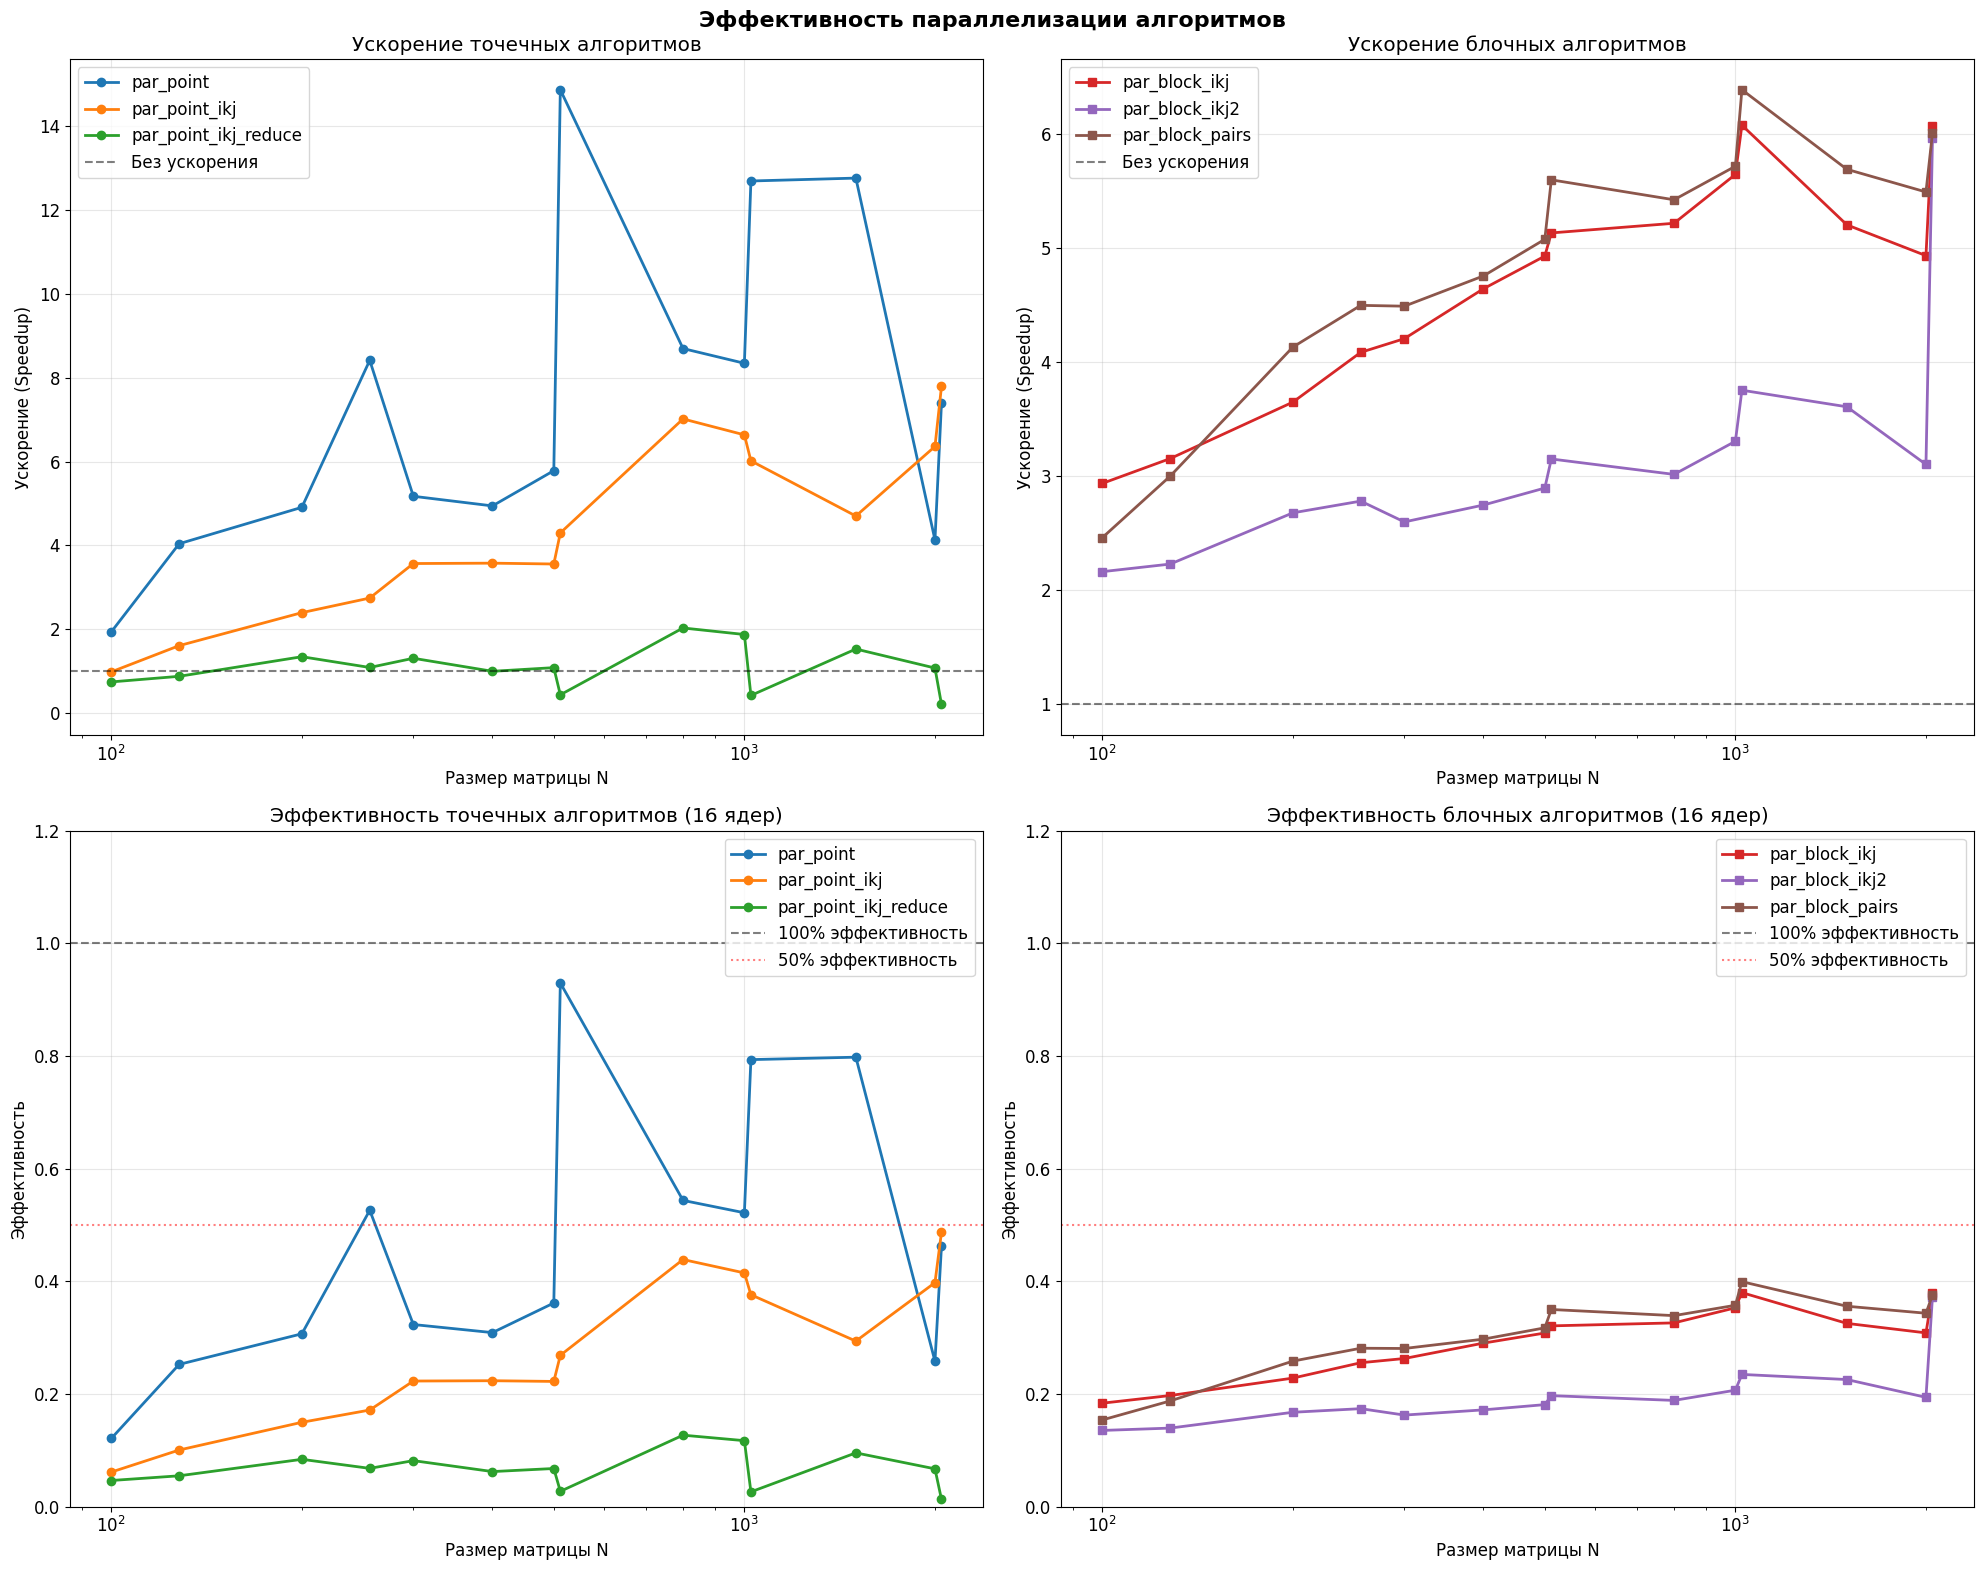

Данные для анализа ускорения:
Всего записей в speedup_df: 84

Количество записей по алгоритмам:
algo
par_point               14
par_point_ikj           14
par_point_ikj_reduce    14
par_block_ikj           14
par_block_ikj2          14
par_block_pairs         14
Name: count, dtype: int64

Статистика эффективности (16 ядер):

Средняя эффективность по алгоритмам:
  par_point                : 0.465 (46.5%)
  par_block_pairs          : 0.307 (30.7%)
  par_block_ikj            : 0.294 (29.4%)
  par_point_ikj            : 0.273 (27.3%)
  par_block_ikj2           : 0.196 (19.6%)
  par_point_ikj_reduce     : 0.067 (6.7%)

Максимальная эффективность по алгоритмам:
  par_point                : 0.929 (92.9%)
  par_point_ikj            : 0.487 (48.7%)
  par_block_pairs          : 0.399 (39.9%)
  par_block_ikj            : 0.380 (38.0%)
  par_block_ikj2           : 0.373 (37.3%)
  par_point_ikj_reduce     : 0.127 (12.7%)


In [32]:
# График 4: Эффективность параллелизации
plt.figure(figsize=(20, 12))

# Вычисляем ускорение (speedup) для параллельных алгоритмов
speedup_data = []

for n in sorted(df['N'].unique()):
    # Базовые алгоритмы (последовательные) - используем среднее время
    point_time = df[(df['N'] == n) & (df['algo'] == 'point')]['duration_ms'].mean()
    point_ikj_time = df[(df['N'] == n) & (df['algo'] == 'point_ikj')]['duration_ms'].mean()
    
    # Для блочных алгоритмов используем среднее время по всем размерам блоков
    block_times = df[(df['N'] == n) & (df['algo'] == 'block')]['duration_ms']
    block_ikj_times = df[(df['N'] == n) & (df['algo'] == 'block_ikj')]['duration_ms']
    
    block_time = block_times.mean() if not block_times.empty else np.nan
    block_ikj_time = block_ikj_times.mean() if not block_ikj_times.empty else np.nan
    
    # Параллельные алгоритмы
    for par_algo in parallel_point_algorithms + parallel_block_algorithms:
        if par_algo in parallel_point_algorithms:
            # Для точечных параллельных алгоритмов используем среднее время
            par_time = df[(df['N'] == n) & (df['algo'] == par_algo)]['duration_ms'].mean()
            # Правильное сопоставление базовых алгоритмов
            if par_algo == 'par_point':
                base_time = point_time
            elif par_algo in ['par_point_ikj', 'par_point_ikj_reduce']:
                base_time = point_ikj_time
            else:
                base_time = point_time  # fallback
        else:
            # Для параллельных блочных алгоритмов используем среднее время по всем размерам блоков
            par_times = df[(df['N'] == n) & (df['algo'] == par_algo)]['duration_ms']
            par_time = par_times.mean() if not par_times.empty else np.nan
            # Правильное сопоставление базовых алгоритмов
            if par_algo in ['par_block_ikj', 'par_block_ikj2', 'par_block_pairs']:
                base_time = block_ikj_time  # все параллельные блочные основаны на block_ikj
            else:
                base_time = block_time  # fallback
        
        if not pd.isna(par_time) and not pd.isna(base_time) and base_time > 0 and par_time > 0:
            speedup = base_time / par_time
            speedup_data.append({
                'N': n,
                'algo': par_algo,
                'speedup': speedup,
                'base_time': base_time,
                'par_time': par_time
            })

speedup_df = pd.DataFrame(speedup_data)

# Определяем фиксированные цвета для каждого алгоритма
colors = {
    'par_point': '#1f77b4',  # синий
    'par_point_ikj': '#ff7f0e',  # оранжевый
    'par_point_ikj_reduce': '#2ca02c',  # зеленый
    'par_block_ikj': '#d62728',  # красный
    'par_block_ikj2': '#9467bd',  # фиолетовый
    'par_block_pairs': '#8c564b'  # коричневый
}

# Создаем графики эффективности
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Эффективность параллелизации алгоритмов', fontsize=16, fontweight='bold')

# График 1: Ускорение точечных алгоритмов
ax1 = axes[0, 0]
for algo in parallel_point_algorithms:
    algo_data = speedup_df[speedup_df['algo'] == algo]
    if not algo_data.empty:
        ax1.plot(algo_data['N'], algo_data['speedup'], marker='o', linewidth=2, 
                label=algo, color=colors[algo])
ax1.axhline(y=1, color='black', linestyle='--', alpha=0.5, label='Без ускорения')
ax1.set_xlabel('Размер матрицы N')
ax1.set_ylabel('Ускорение (Speedup)')
ax1.set_title('Ускорение точечных алгоритмов')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xscale('log')

# График 2: Ускорение блочных алгоритмов
ax2 = axes[0, 1]
for algo in parallel_block_algorithms:
    algo_data = speedup_df[speedup_df['algo'] == algo]
    if not algo_data.empty:
        ax2.plot(algo_data['N'], algo_data['speedup'], marker='s', linewidth=2, 
                label=algo, color=colors[algo])
ax2.axhline(y=1, color='black', linestyle='--', alpha=0.5, label='Без ускорения')
ax2.set_xlabel('Размер матрицы N')
ax2.set_ylabel('Ускорение (Speedup)')
ax2.set_title('Ускорение блочных алгоритмов')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xscale('log')

# График 3: Эффективность (Efficiency) - предполагаем 16 ядер
num_cores = 16
ax3 = axes[1, 0]
for algo in parallel_point_algorithms:
    algo_data = speedup_df[speedup_df['algo'] == algo]
    if not algo_data.empty:
        # Эффективность = фактическое ускорение / теоретическое максимальное ускорение
        # Теоретическое максимальное ускорение = количество ядер
        efficiency = algo_data['speedup'] / num_cores
        ax3.plot(algo_data['N'], efficiency, marker='o', linewidth=2, 
                label=algo, color=colors[algo])
ax3.axhline(y=1.0, color='black', linestyle='--', alpha=0.5, label='100% эффективность')
ax3.axhline(y=0.5, color='red', linestyle=':', alpha=0.5, label='50% эффективность')
ax3.set_xlabel('Размер матрицы N')
ax3.set_ylabel('Эффективность')
ax3.set_title('Эффективность точечных алгоритмов (16 ядер)')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_xscale('log')
ax3.set_ylim(0, 1.2)  # Ограничиваем масштаб для лучшей читаемости

# График 4: Эффективность блочных алгоритмов
ax4 = axes[1, 1]
for algo in parallel_block_algorithms:
    algo_data = speedup_df[speedup_df['algo'] == algo]
    if not algo_data.empty:
        # Эффективность = фактическое ускорение / теоретическое максимальное ускорение
        efficiency = algo_data['speedup'] / num_cores
        ax4.plot(algo_data['N'], efficiency, marker='s', linewidth=2, 
                label=algo, color=colors[algo])
ax4.axhline(y=1.0, color='black', linestyle='--', alpha=0.5, label='100% эффективность')
ax4.axhline(y=0.5, color='red', linestyle=':', alpha=0.5, label='50% эффективность')
ax4.set_xlabel('Размер матрицы N')
ax4.set_ylabel('Эффективность')
ax4.set_title('Эффективность блочных алгоритмов (16 ядер)')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_xscale('log')
ax4.set_ylim(0, 1.2)  # Ограничиваем масштаб для лучшей читаемости

plt.tight_layout()
plt.show()

# Выводим информацию о данных
print("Данные для анализа ускорения:")
print(f"Всего записей в speedup_df: {len(speedup_df)}")
print("\nКоличество записей по алгоритмам:")
print(speedup_df['algo'].value_counts())

# Статистика эффективности
if not speedup_df.empty:
    print(f"\nСтатистика эффективности (16 ядер):")
    efficiency_stats = speedup_df.copy()
    efficiency_stats['efficiency'] = efficiency_stats['speedup'] / num_cores
    
    print("\nСредняя эффективность по алгоритмам:")
    avg_efficiency = efficiency_stats.groupby('algo')['efficiency'].mean().sort_values(ascending=False)
    for algo, eff in avg_efficiency.items():
        print(f"  {algo:<25}: {eff:.3f} ({eff*100:.1f}%)")
    
    print("\nМаксимальная эффективность по алгоритмам:")
    max_efficiency = efficiency_stats.groupby('algo')['efficiency'].max().sort_values(ascending=False)
    for algo, eff in max_efficiency.items():
        print(f"  {algo:<25}: {eff:.3f} ({eff*100:.1f}%)")


<Figure size 2000x1200 with 0 Axes>

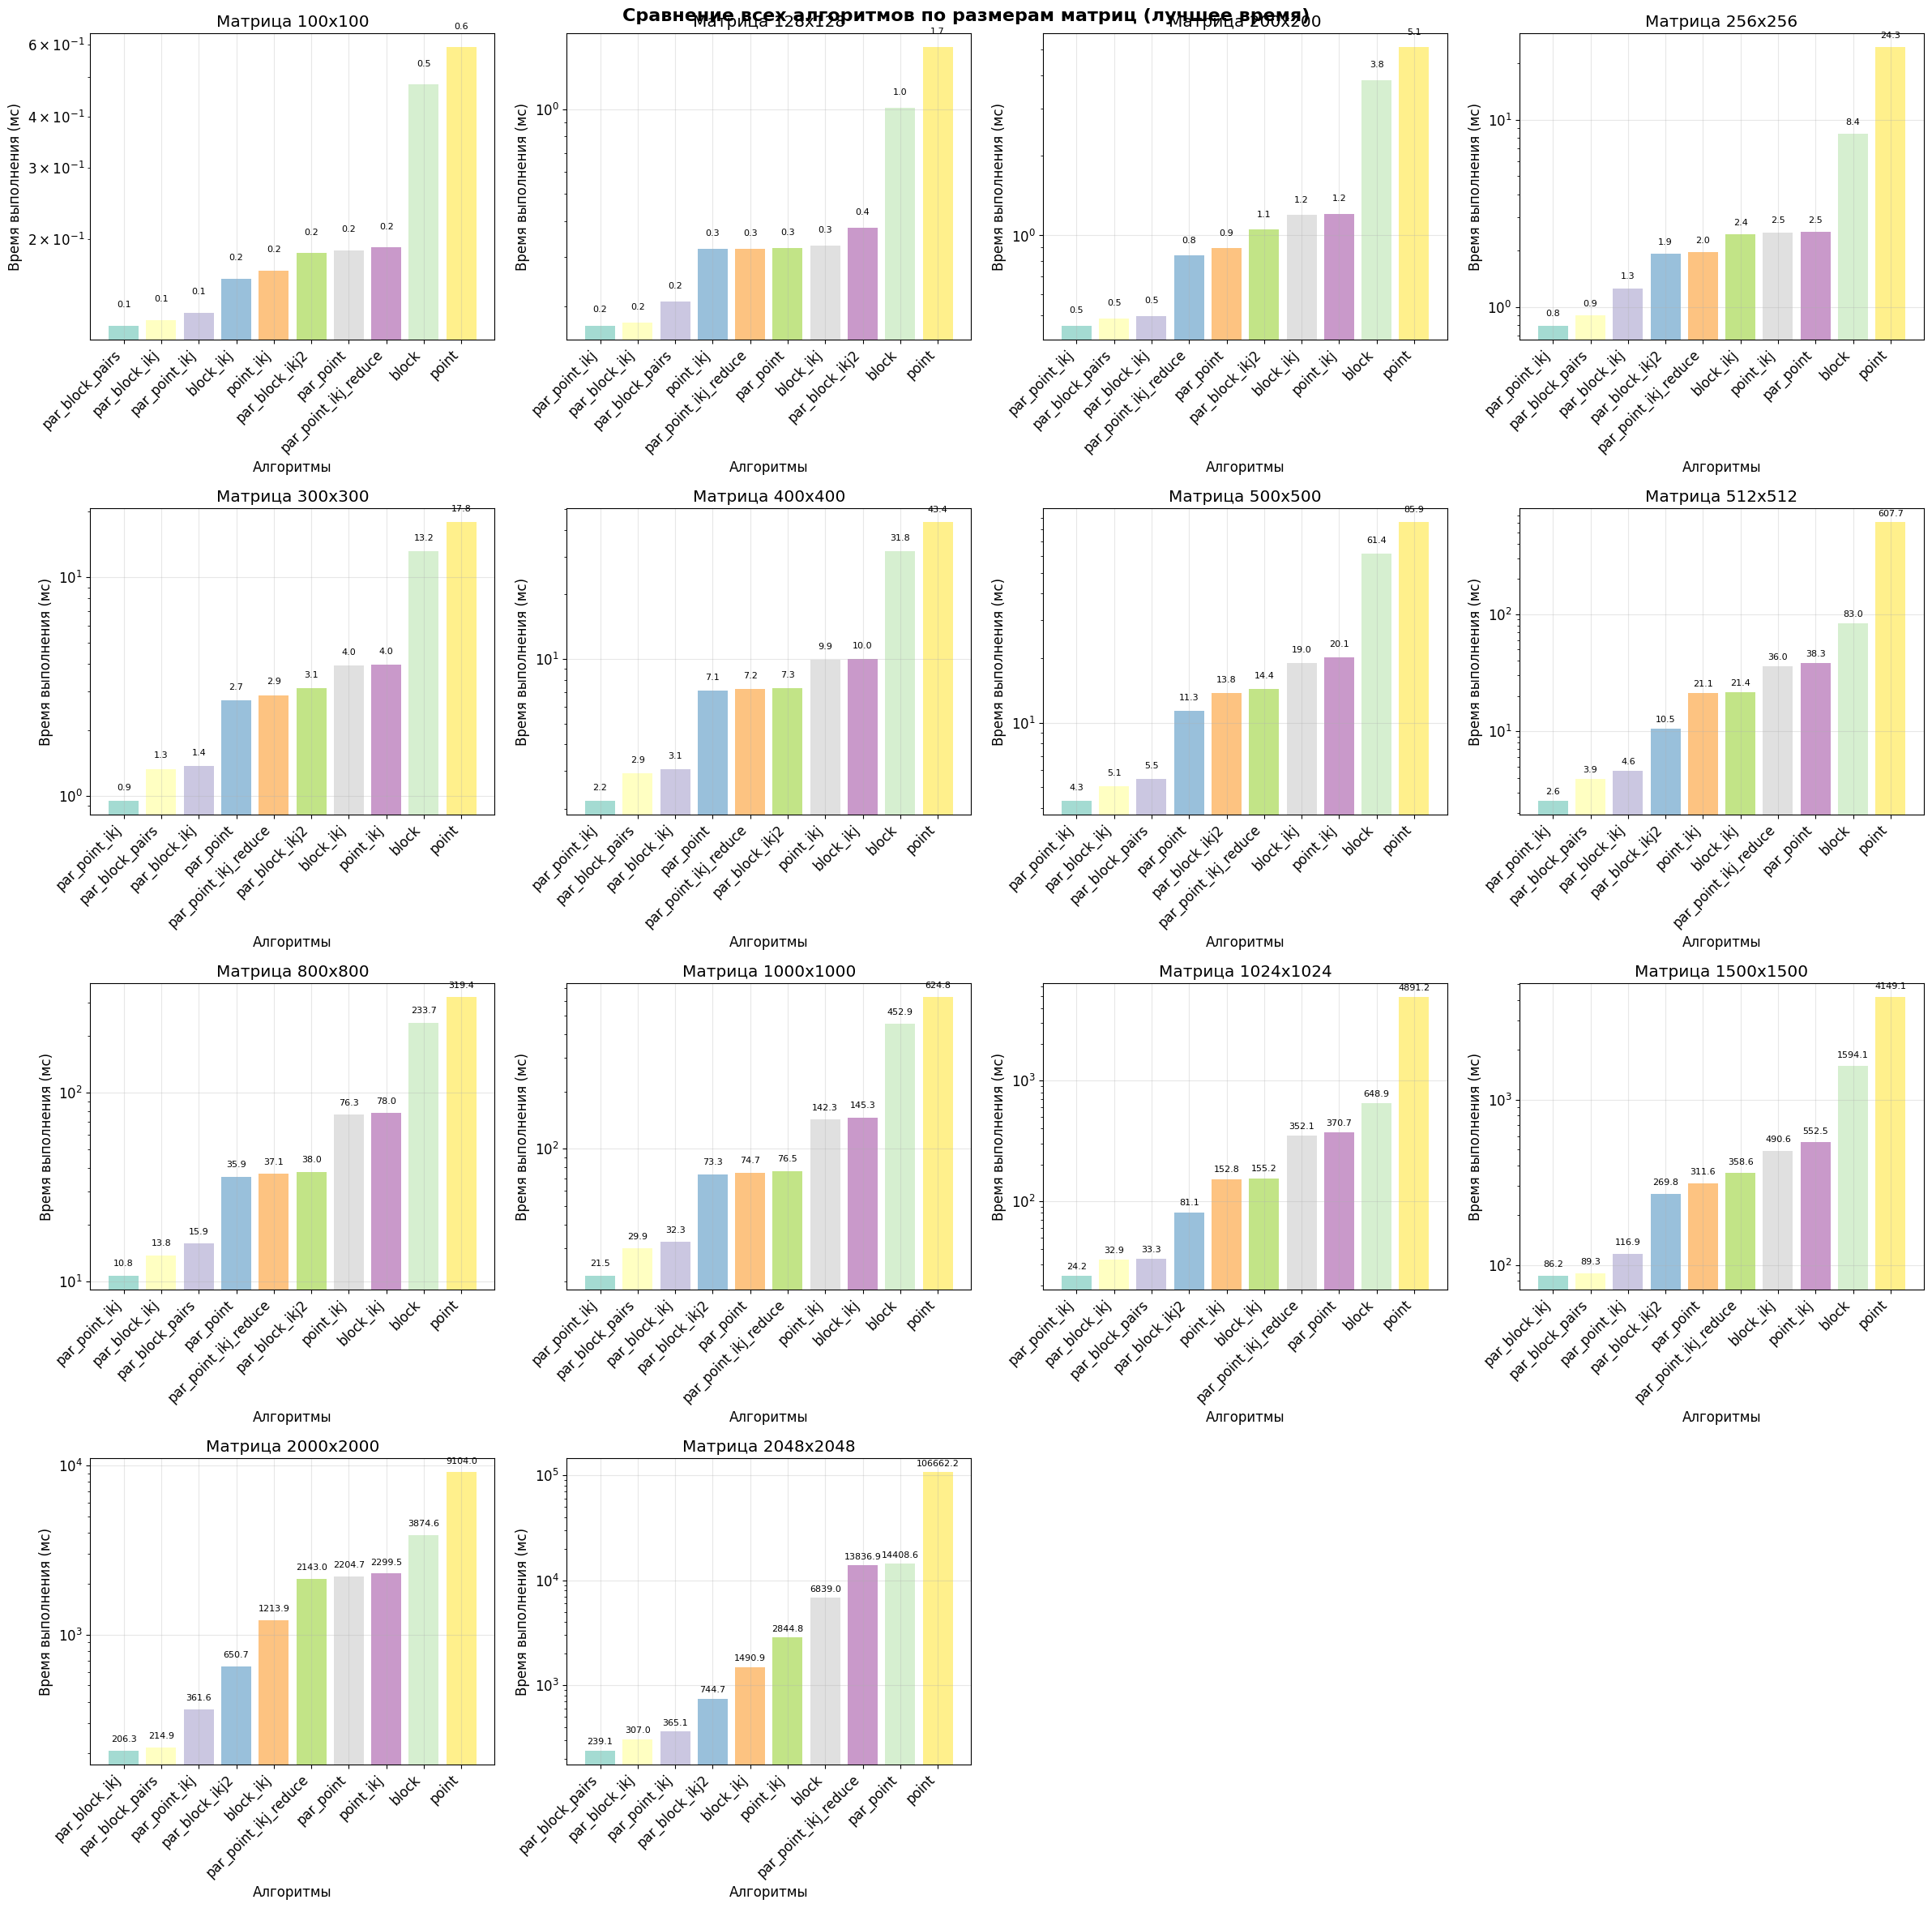

In [33]:
# График 6: Сравнение всех алгоритмов на одном графике
plt.figure(figsize=(20, 12))

# Используем все размеры матриц из данных
all_sizes = sorted(df['N'].unique())
colors = plt.cm.Set3(np.linspace(0, 1, len(df['algo'].unique())))

# Создаем подграфики для всех размеров матриц
n_subplots = len(all_sizes)
n_cols = 4
n_rows = (n_subplots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 6*n_rows))
fig.suptitle('Сравнение всех алгоритмов по размерам матриц (лучшее время)', fontsize=16, fontweight='bold')

# Если только один ряд, делаем axes одномерным массивом
if n_rows == 1:
    axes = axes.reshape(1, -1)

for idx, n in enumerate(all_sizes):
    row = idx // n_cols
    col = idx % n_cols
    ax = axes[row, col]
    
    # Данные для данного размера матрицы
    n_data = df[df['N'] == n]
    
    if not n_data.empty:
        # Для блочных алгоритмов выбираем лучшее время по всем размерам блоков
        best_times = []
        for algo in df['algo'].unique():
            algo_data = n_data[n_data['algo'] == algo]
            if not algo_data.empty:
                best_time = algo_data['duration_ms'].min()  # Лучшее время
                best_times.append({'algo': algo, 'time': best_time})
        
        best_times_df = pd.DataFrame(best_times)
        best_times_df = best_times_df.sort_values('time')
        
        # Создаем столбчатую диаграмму
        bars = ax.bar(range(len(best_times_df)), best_times_df['time'].values, 
                     color=colors[:len(best_times_df)], alpha=0.8)
        
        ax.set_xlabel('Алгоритмы')
        ax.set_ylabel('Время выполнения (мс)')
        ax.set_title(f'Матрица {n}x{n}')
        ax.set_xticks(range(len(best_times_df)))
        ax.set_xticklabels(best_times_df['algo'], rotation=45, ha='right')
        ax.set_yscale('log')
        ax.grid(True, alpha=0.3)
        
        # Добавляем значения на столбцы
        for bar, value in zip(bars, best_times_df['time'].values):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.1, 
                   f'{value:.1f}', ha='center', va='bottom', fontsize=8)

# Скрываем пустые подграфики
for idx in range(len(all_sizes), n_rows * n_cols):
    row = idx // n_cols
    col = idx % n_cols
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()
